# Student Grade Regression - Math

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Data Preprocessing and Visualization

### 2.1. Load Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('student-mat.csv')

### 2.2. Analyze Data

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df = df.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df)
# df = imputer.transform(df)

# df.isnull().sum()

In [7]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(395, 32) (395,)


### 2.3. Visualize Data

#### **Visualization Labels**

In [9]:
# Gender: Male or Female
gender_labels = ['F - Female', 'M - Male']
# Number of Failures
failure_labels = ['0 failures', '1 failure', '2 failures', '3 failures']

#### Age Distribution

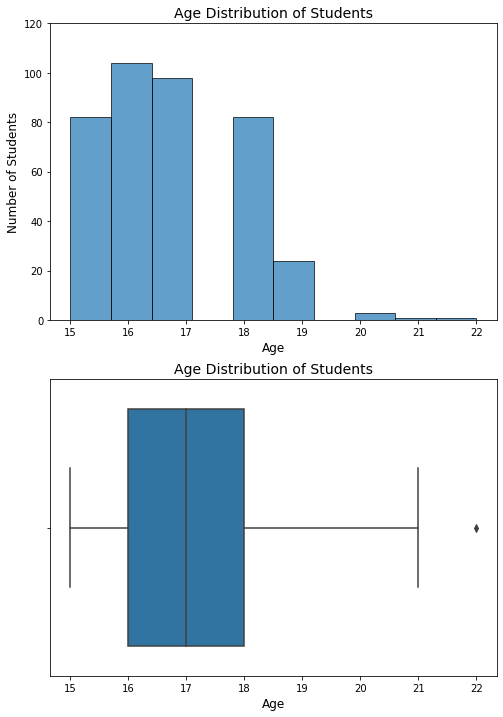

In [10]:
# Define subplot
age_dist = plt.figure(figsize=(8, 12))

# Age distribution histogram
ax1 = age_dist.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['age'], alpha=0.7, edgecolor='black')
# Adjust Y-Axis range
plt.yticks(np.arange(0, 140, 20))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Age Distribution of Students', fontsize=14)

# Age distribution box plot
ax2 = age_dist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['age'])
# Adjust X-Axis range
plt.xticks(np.arange(15, 23, 1))
# Plot title and label
plt.xlabel('Age', fontsize=12)
plt.title('Age Distribution of Students', fontsize=14)

# Show subplot
plt.show()

#### Gender Distribution

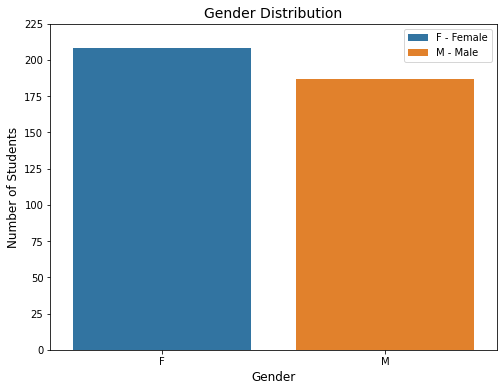

In [11]:
# Define figure
gender_dist = plt.figure(figsize=(8, 6))

# Gender distribution
gender_dist = sns.countplot(x=df['sex'], hue=df['sex'], dodge=False)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 250, 25))
# Plot title and labels
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Show figure
plt.show()

#### Extracurricular Activities

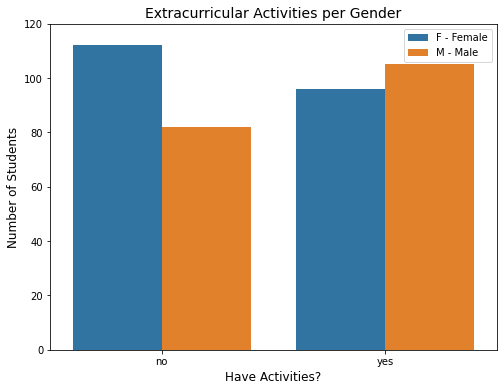

In [12]:
# Define figure
ea_dist = plt.figure(figsize=(8, 6))

# Extracurricular Activities distribution
ea_dist = sns.countplot(x=df['activities'], hue=df['sex'], dodge=True)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 140, 20))
# Plot title and labels
plt.xlabel('Have Activities?', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Extracurricular Activities per Gender', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Show figure
plt.show()

#### Travel Time from Home to School

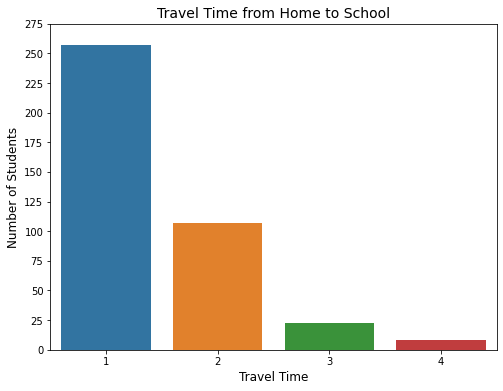

In [13]:
# Define figure
travel_time = plt.figure(figsize=(8, 6))

# Travel Time distribution
travel_time = sns.countplot(x=df['traveltime'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 300, 25))
# Plot title and labels
plt.xlabel('Travel Time', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Travel Time from Home to School', fontsize=14)

# Show figure
plt.show()

##### **Travel Time:**

- **1:** <15 minutes
- **2:** 15-30 minutes
- **3:** 30 minutes - 1 hour
- **4:** >1 hour

#### Weekly Studying Time 

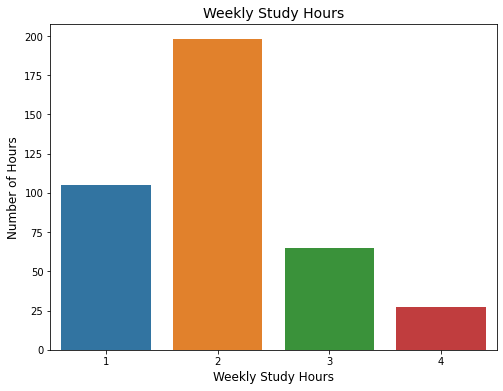

In [14]:
# Define figure
weekly_study_time = plt.figure(figsize=(8, 6))

# Weekly Study Time distribution
weekly_study_time = sns.countplot(x=df['studytime'], dodge=True)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 225, 25))
# Plot title and labels
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)
plt.title('Weekly Study Hours', fontsize=14)

# Show figure
plt.show()

##### **Weekly Study Hours:**

- **1:** <2 hours
- **2:** 2-5 hours
- **3:** 5-10 hours
- **4:** >10 hours

#### Average Number of Absences per Age

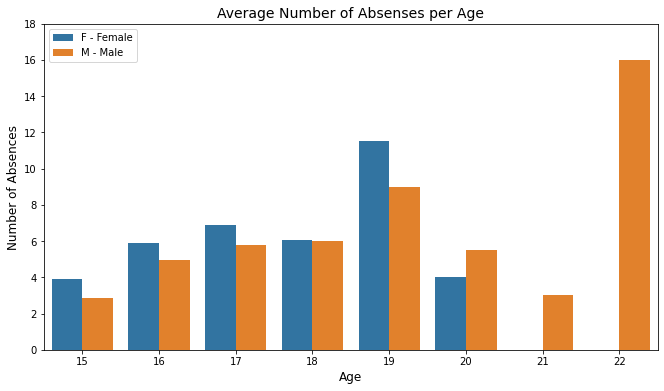

In [15]:
# Define figure
plt.figure(figsize=(11, 6))

# Average Number of Absences distribution
sns.barplot(x=df['age'], y=df['absences'], hue=df['sex'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 20, 2))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Average Number of Absenses per Age', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper left')

# Show figure
plt.show()

#### Number of Absences Percentile Distribution

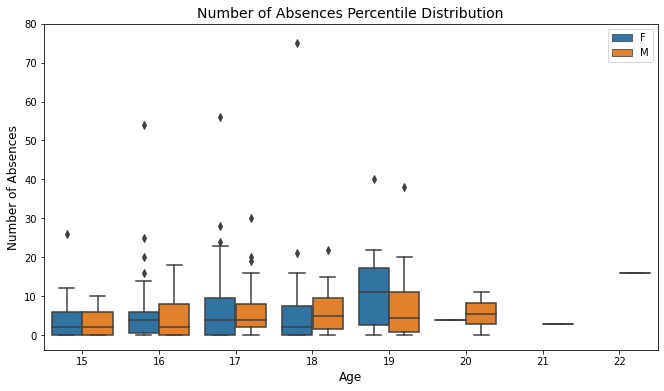

In [16]:
# Define figure
plt.figure(figsize=(11, 6))

# Number of Absences Percentile Distribution (box plot)
sns.boxplot(x=df['age'], y=df['absences'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 90, 10))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Number of Absences Percentile Distribution', fontsize=14)
# Plot legend
plt.legend(loc='upper right')

# Show figure
plt.show()

#### Number of Failures per Age

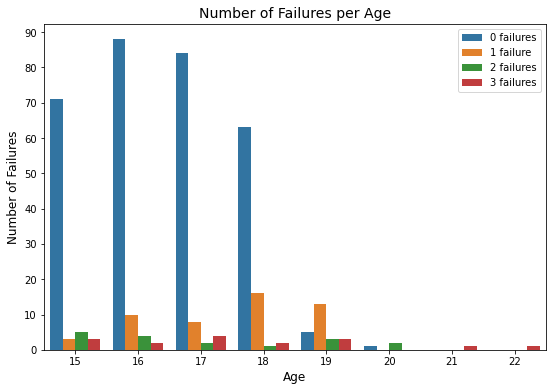

In [17]:
# Define figure
plt.figure(figsize=(9, 6))

# Number of failure rates per age
sns.countplot(x=df['age'], hue=df['failures'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 100, 10))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Failures', fontsize=12)
plt.title('Number of Failures per Age', fontsize=14)
# Plot legend
plt.legend(labels=failure_labels, loc='upper right')

# Show figure
plt.show()

#### Pairwise Relationships Between Absenses and Grades

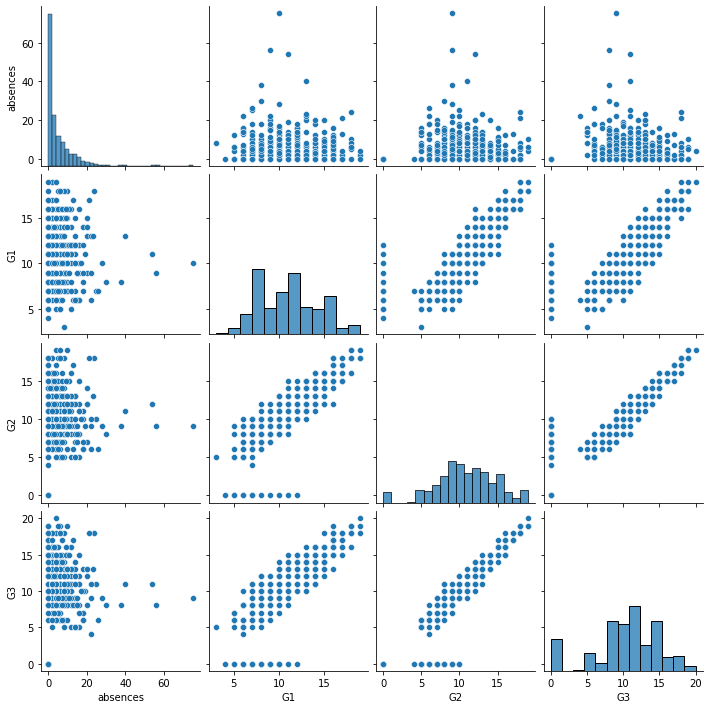

In [18]:
# Pairwise distributions
df_pairplot = df[['absences', 'G1', 'G2', 'G3']]
sns.pairplot(df_pairplot)
# Adjust X and Y-Axies (if required)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show figure
plt.show()

#### Absenses and Grades

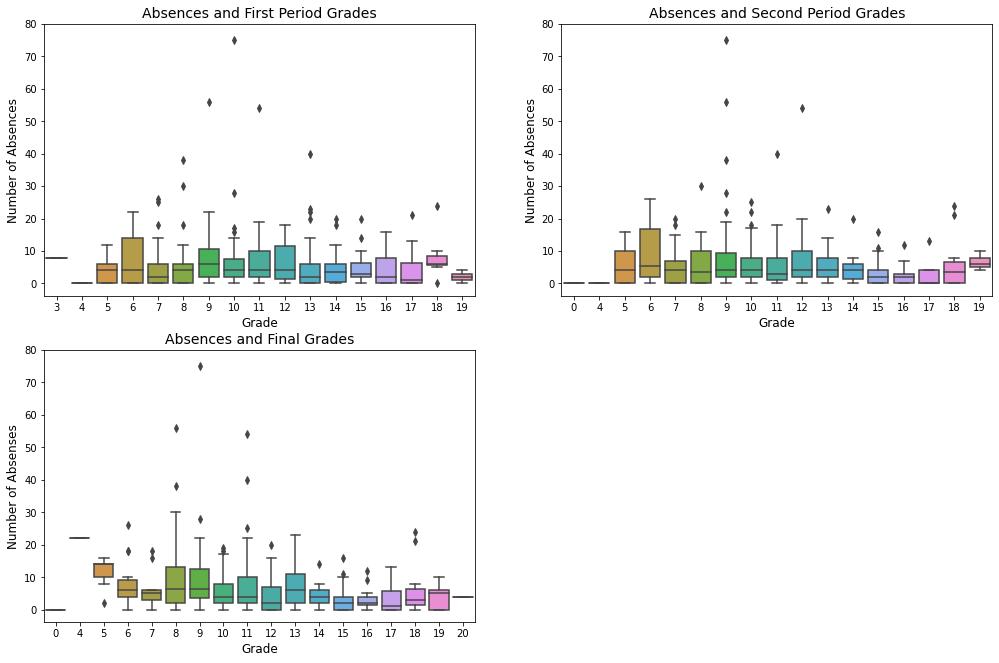

In [19]:
# Define subplot
absences_and_grades = plt.figure(figsize=(17, 11))

# First period grades
ax1 = absences_and_grades.add_subplot(2, 2, 1)
ax1 = sns.boxplot(x=df['G1'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 90, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Absences and First Period Grades', fontsize=14)

# Second period grades
ax2 = absences_and_grades.add_subplot(2, 2, 2)
ax2 = sns.boxplot(x=df['G2'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 90, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Absences and Second Period Grades', fontsize=14)

# Final grades
ax3 = absences_and_grades.add_subplot(2, 2, 3)
ax3 = sns.boxplot(x=df['G3'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 90, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absenses', fontsize=12)
plt.title('Absences and Final Grades', fontsize=14)

# Show subplot
plt.show()

#### Grades Distribution

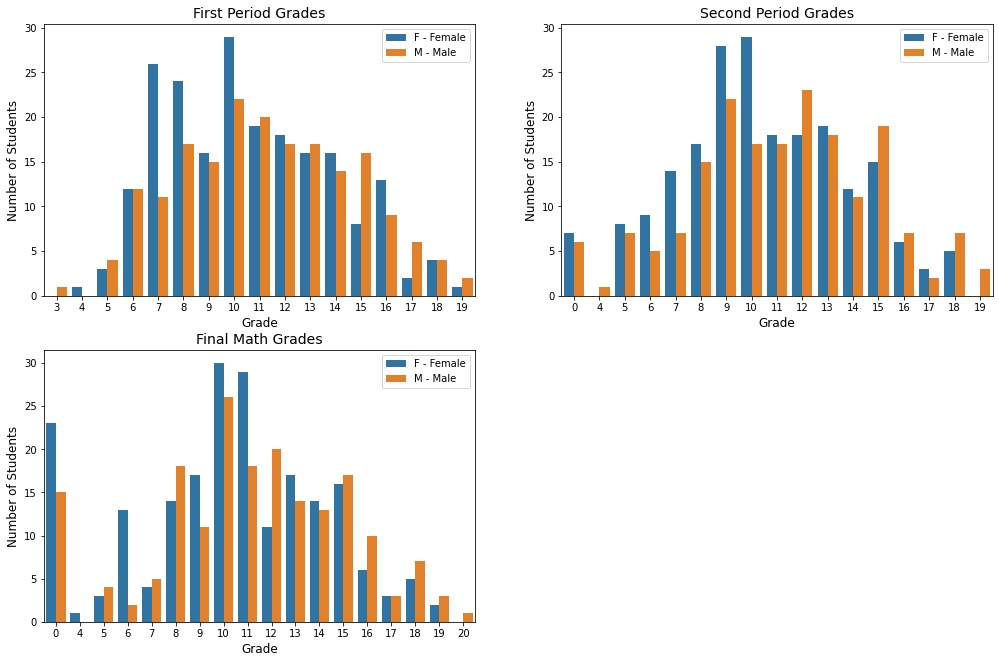

In [20]:
# Define subplot
math_grades = plt.figure(figsize=(17, 11))

# First period grades
ax1 = math_grades.add_subplot(2, 2, 1)
ax1 = sns.countplot(x=df['G1'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 35, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('First Period Grades', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Second period grades
ax2 = math_grades.add_subplot(2, 2, 2)
ax2 = sns.countplot(x=df['G2'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 35, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Second Period Grades', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Final grades
ax3 = math_grades.add_subplot(2, 2, 3)
ax3 = sns.countplot(x=df['G3'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 35, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Final Math Grades', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Show subplot
plt.show()

#### Correlation Map

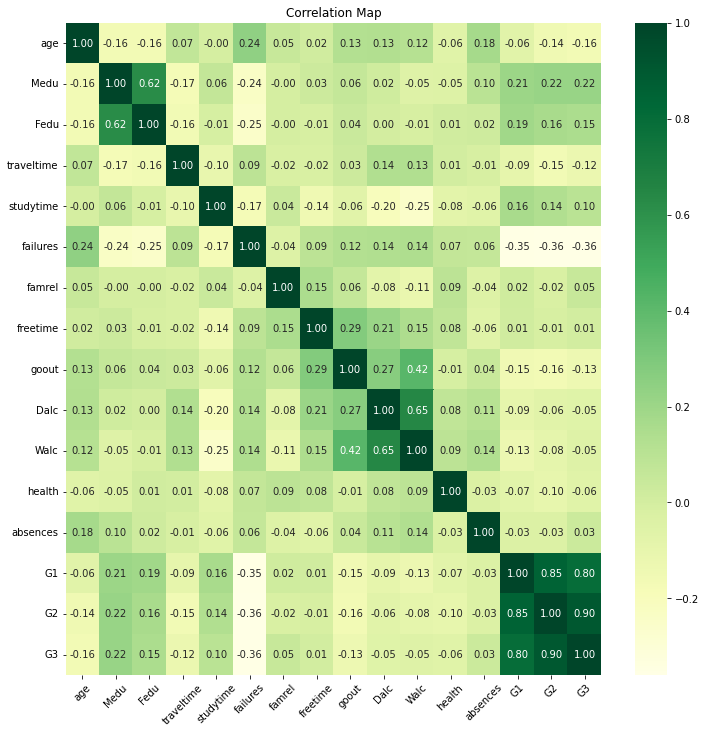

In [21]:
# Define correlation map figure
plt.figure(figsize=(12,12))

# Correlation Map
sns.heatmap(df.corr(), cmap='YlGn', annot=True, fmt = ".2f")
# Adjust X and Y-Axes (if required)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map')

# Show figure
plt.show()

### 2.4. Feature Engineering

In [22]:
# Label Encode Columns, Indices: 0-1, 3-5, 15-22
le = LabelEncoder()
le_columns = [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22]

# Apply Label Encoding 
for i in le_columns:
  X[:, i] = le.fit_transform(X[:, i])

print(X)

[[0 0 18 ... 6 5 6]
 [0 0 17 ... 4 5 5]
 [0 0 15 ... 10 7 8]
 ...
 [1 1 21 ... 3 10 8]
 [1 1 18 ... 0 11 12]
 [1 1 19 ... 5 8 9]]


In [23]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [24]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 3. Define and Evaluate Models

In [25]:
# Linear Regression (LR)
from sklearn.linear_model import LinearRegression
# Support Vector Machine - Regression (SVR)
from sklearn.svm import SVR
# Decision Tree (DT)
from sklearn.tree import DecisionTreeRegressor
# Random Forest (RF)
from sklearn.ensemble import RandomForestRegressor
# XGBoost (XGB)
import xgboost as xgb
from xgboost import XGBRegressor
# Deep Neural Network (DNN)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#### **Important Functions**

In [26]:
# Summarize prediction results
def summarize_results(model):
  """
  model - Summarize results for Machine Learning model
  """

  # Mean Absolute Error (MAE)
  print('MAE: %.3f' % (mean_absolute_error(y_test, model)))
  # Mean Squared Error (MSE)
  print('MSE: %.3f' % (mean_squared_error(y_test, model)))
  # Root Mean Squared Error (RMSE)
  print('RMSE: %.3f' % (mean_squared_error(y_test, model, squared=False)))
  # R^2 Score (Goodness-of-Fit)
  print('R^2 Score: %.3f' % (r2_score(y_test, model)))

In [27]:
# Plot prediction and validation distributions
def plot_dist(model, colour, a, x_range, y_range):
  """
  model   - Machine Learning model implemented
  colour  - Colour for predictions
  a       - Colour adjustment for predictions (alpha)
  x_range - X-Axis range of values
  y_range - Y-Axis range of values
  """
  
  # Define subplot
  fig = plt.figure(figsize=(15, 12))

  # Histogram for predicted model
  ax1 = fig.add_subplot(2, 2, 1)
  ax1 = plt.hist(x=model, facecolor=colour, alpha=a, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.ylabel('Number of Students', fontsize=12)
  plt.title('Predicted Grade Distribution', fontsize=14)

  # Histogram for y_test
  ax2 = fig.add_subplot(2, 2, 2)
  ax2 = plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.ylabel('Number of Students', fontsize=12)
  plt.title('Validation Grade Distribution', fontsize=14)

  # Box plot for predicted model
  ax3 = fig.add_subplot(2, 2, 3)
  ax3 = sns.boxplot(x=model, color=colour)
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.title('Predicted Grade Distribution', fontsize=14)

  # Box plot for y_test
  ax4 = fig.add_subplot(2, 2, 4)
  ax4 = sns.boxplot(x=y_test, color='orange')
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.title('Validation Grade Distribution', fontsize=14)

  # Return figure to show
  return fig

In [28]:
# Plot results trends
def pred_results(model, pred, y_range, train_window, test_window, 
                 train_legend_loc, test_legend_loc):
  """
  model            - Machine Learning model implemented
  pred             - Model predictions
  y_range          - Y-Axis range of values
  train_window     - Extra space for legend (training set)
  test_window      - Extra space for legend (test set)
  train_legend_loc - Legend location for training set prediction trends
  test_legend_loc  - Legend location for test set prediction trends
  """

  # Define subplot
  results_fig = plt.figure(figsize=(16, 12))

  # Training set plot
  ax1 = results_fig.add_subplot(2, 1, 1)
  plt.plot(y_train, color = 'red', label = 'Training Set')
  plt.plot(model.predict(X_train), color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(X_train)+train_window, 25))
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Number of Students', fontsize=12)
  plt.ylabel('Grade', fontsize=12)
  plt.title('Predicted Final Grades', fontsize=14)
  # Legend and grid
  plt.legend(loc=train_legend_loc)
  plt.grid()

  # Test set plot
  ax2 = results_fig.add_subplot(2, 1, 2)
  plt.plot(y_test, color = 'red', label = 'Test Set')
  plt.plot(pred, color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(y_test)+test_window, test_window))
  plt.yticks(y_range)
  # Plot title and labels
  plt.xlabel('Number of Students', fontsize=12)
  plt.ylabel('Grade', fontsize=12)
  plt.title('Validation Final Grades', fontsize=14)
  # Legend and grid
  plt.legend(loc=test_legend_loc)
  plt.grid()

  # Return figure to show
  return results_fig

In [29]:
# Apply k-Fold Cross Validation on the training set
def k_fold(model, n=10):
  """
  model - Machine Learning model implemented
  n     - number of k-Folds (default 10)
  """
  
  # Lists of values
  r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
  rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
  # Cross validate for n k-folds
  # RepeatedStratifiedKFold - 3 repeats for each k-Fold
  for i in range(2, 2+n):
    cv = RepeatedStratifiedKFold(n_splits = i, n_repeats = 3, random_state = 0)
    # Collect appropriate Key Performance Indicator (KPI) results per k-Fold
    r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    # mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    rmse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    
    # Force scores to be positive
    r2_scores = abs(r2_scores)
    rmse_scores = abs(rmse_scores)

    # Print R^2 scores
    print('')
    print('-- Fold: %d --' % (i-1))
    print('')
    print('R^2 Scoring:')
    print("Mean: %f" % (np.mean(r2_scores)))
    print("Std: +/- %f" % (np.std(r2_scores)))
    print("Min: %f" % (np.min(r2_scores)))
    print("Max: %f" % (np.max(r2_scores)))
    
    # Print RMSE scores
    print('')
    print('RMSE Scoring:')
    print("Mean: %f" % (np.mean(rmse_scores)))
    print("Std: +/- %f" % (np.std(rmse_scores)))
    print("Min: %f" % (np.min(rmse_scores)))
    print("Max: %f" % (np.max(rmse_scores)))
    print('')
    
    # Append R^2 scores
    r2_means.append(np.mean(r2_scores))
    r2_stds.append(np.std(r2_scores))
    r2_mins.append(np.min(r2_scores))
    r2_maxs.append(np.max(r2_scores))

    # Append RMSE scores
    rmse_means.append(np.mean(rmse_scores))
    rmse_stds.append(np.std(rmse_scores))
    rmse_mins.append(np.min(rmse_scores))
    rmse_maxs.append(np.max(rmse_scores))

  # Define subplot figure
  k_fold_results = plt.figure(figsize=(15, 10))

  # Plot R^2 scores per k-fold:
  ax1 = k_fold_results.add_subplot(2, 2, 1)
  ax1.plot(np.arange(1,1+n), r2_means, color='red', label='Mean')
  ax1.plot(np.arange(1,1+n), r2_mins, color='green', label='Min')
  ax1.plot(np.arange(1,1+n), r2_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax1.set_xlabel('k-Fold', fontsize=12)
  ax1.set_ylabel('R^2 Score', fontsize=12)
  ax1.set_title('R^2 Score per k-Fold', fontsize=14)
  # Legend and grid
  ax1.legend()
  ax1.grid(True)

  # Plot R^2 Standard Deviations per k-fold:
  ax2 = k_fold_results.add_subplot(2, 2, 2)
  ax2.plot(np.arange(1,1+n), r2_stds, color='red')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax2.set_xlabel('k-Fold', fontsize=12)
  ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax2.grid(True)

  # Plot RMSE scores per k-fold:
  ax3 = k_fold_results.add_subplot(2, 2, 3)
  ax3.plot(np.arange(1,1+n), rmse_means, color='orangered', label='Mean')
  ax3.plot(np.arange(1,1+n), rmse_mins, color='green', label='Min')
  ax3.plot(np.arange(1,1+n), rmse_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax3.set_xlabel('k-Fold', fontsize=12)
  ax3.set_ylabel('RMSE Score', fontsize=12)
  ax3.set_title('RMSE Score per k-Fold', fontsize=14)
  # Legend and grid
  ax3.legend()
  ax3.grid(True)

  # Plot RMSE Standard Deviations per k-fold:
  ax4 = k_fold_results.add_subplot(2, 2, 4)
  ax4.plot(np.arange(1,1+n), rmse_stds, color='orangered')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax4.set_xlabel('k-Fold', fontsize=12)
  ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax4.grid(True)

  # Show subplot
  plt.show()

  # Return cv for Grid Searching hyperparameter tuning (optimization)
  return cv

### Linear Regression (LR)

In [30]:
# Define LR model
lr_reg = LinearRegression()

# Train LR model
lr_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(lr_pred)

MAE: 1.546
MSE: 5.751
RMSE: 2.398
R^2 Score: 0.792


<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>1.546</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>5.751</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>2.398</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.792</td>
    </tr>
  </tbody>
</table>

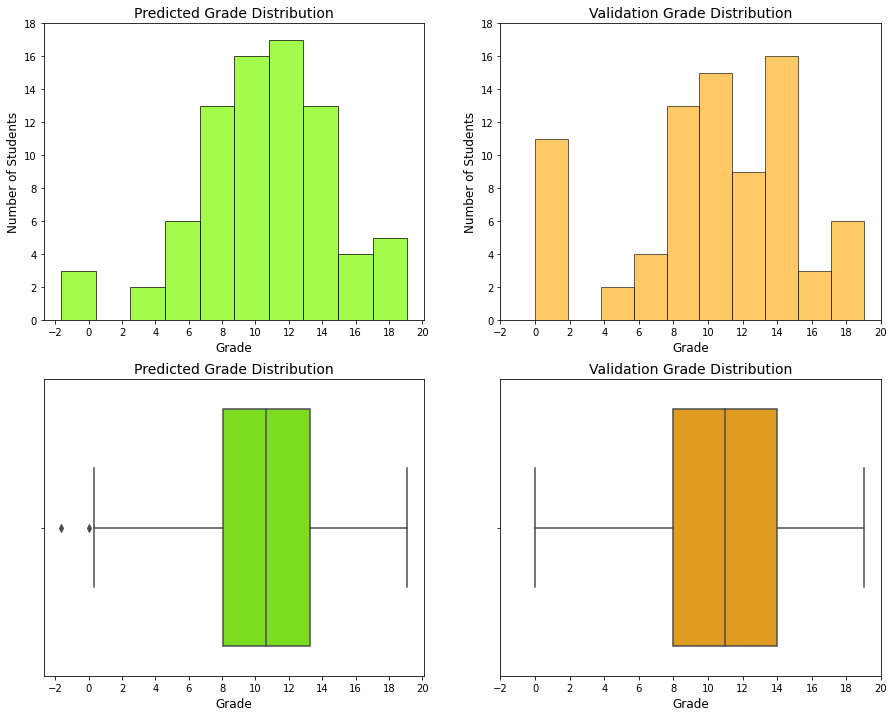

In [32]:
# Display LR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lr_dist = plot_dist(lr_pred, 'lawngreen', 0.7, np.arange(-2, 22, 2), 
                    np.arange(0, 20, 2))

# Show subplot
plt.show()

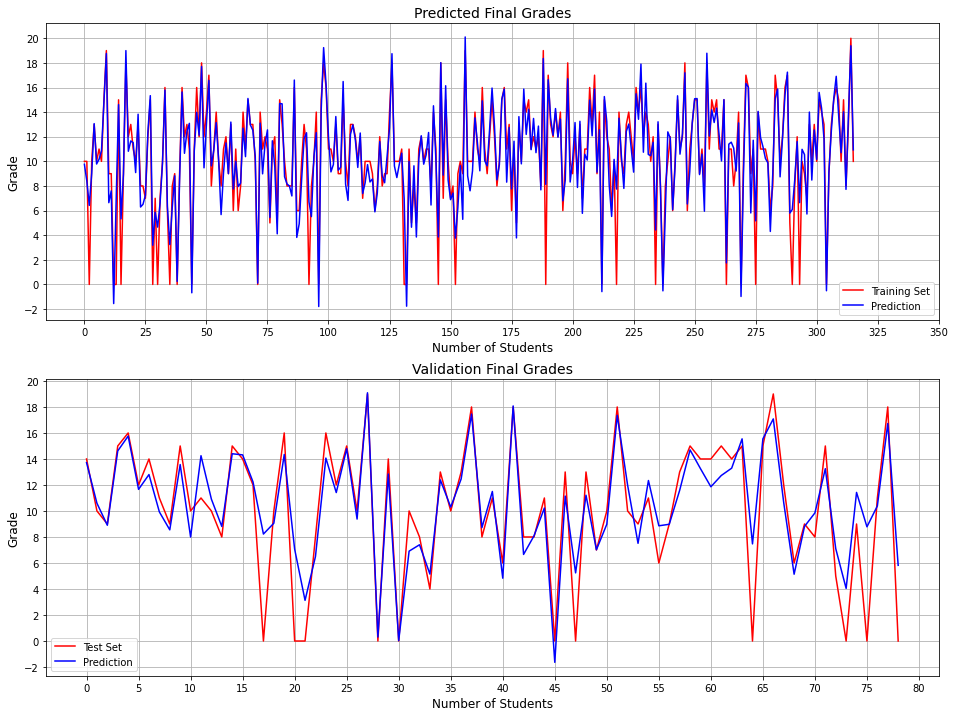

In [33]:
# Display LR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lr_results = pred_results(lr_reg, lr_pred, np.arange(-2, 22, 2), 50, 5, 
                          "lower right", "lower left")

# Show subplot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.794095
Std: +/- 0.016333
Min: 0.769800
Max: 0.818128

RMSE Scoring:
Mean: 1.987834
Std: +/- 0.048641
Min: 1.908819
Max: 2.062407


-- Fold: 2 --

R^2 Scoring:
Mean: 0.812759
Std: +/- 0.019875
Min: 0.784399
Max: 0.841959

RMSE Scoring:
Mean: 1.896299
Std: +/- 0.106890
Min: 1.741165
Max: 2.048187



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 3 --

R^2 Scoring:
Mean: 0.808882
Std: +/- 0.040299
Min: 0.717966
Max: 0.849757

RMSE Scoring:
Mean: 1.906065
Std: +/- 0.193082
Min: 1.673531
Max: 2.335506


-- Fold: 4 --

R^2 Scoring:
Mean: 0.812776
Std: +/- 0.046805
Min: 0.710299
Max: 0.900271

RMSE Scoring:
Mean: 1.879875
Std: +/- 0.233003
Min: 1.434540
Max: 2.340976



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 5 --

R^2 Scoring:
Mean: 0.809250
Std: +/- 0.046008
Min: 0.689717
Max: 0.859594

RMSE Scoring:
Mean: 1.899566
Std: +/- 0.211224
Min: 1.538295
Max: 2.412682


-- Fold: 6 --

R^2 Scoring:
Mean: 0.814265
Std: +/- 0.067947
Min: 0.632743
Max: 0.936649

RMSE Scoring:
Mean: 1.857490
Std: +/- 0.343469
Min: 1.089376
Max: 2.631213



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 7 --

R^2 Scoring:
Mean: 0.814993
Std: +/- 0.049218
Min: 0.731073
Max: 0.913877

RMSE Scoring:
Mean: 1.862126
Std: +/- 0.257316
Min: 1.217672
Max: 2.282532



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(



-- Fold: 8 --

R^2 Scoring:
Mean: 0.814594
Std: +/- 0.066561
Min: 0.681802
Max: 0.943656

RMSE Scoring:
Mean: 1.851832
Std: +/- 0.356871
Min: 1.049783
Max: 2.487433



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn


-- Fold: 9 --

R^2 Scoring:
Mean: 0.814097
Std: +/- 0.061363
Min: 0.695134
Max: 0.930670

RMSE Scoring:
Mean: 1.855326
Std: +/- 0.335113
Min: 1.130590
Max: 2.479863



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(



-- Fold: 10 --

R^2 Scoring:
Mean: 0.815440
Std: +/- 0.075807
Min: 0.644214
Max: 0.948469

RMSE Scoring:
Mean: 1.833298
Std: +/- 0.420068
Min: 0.945846
Max: 2.658315



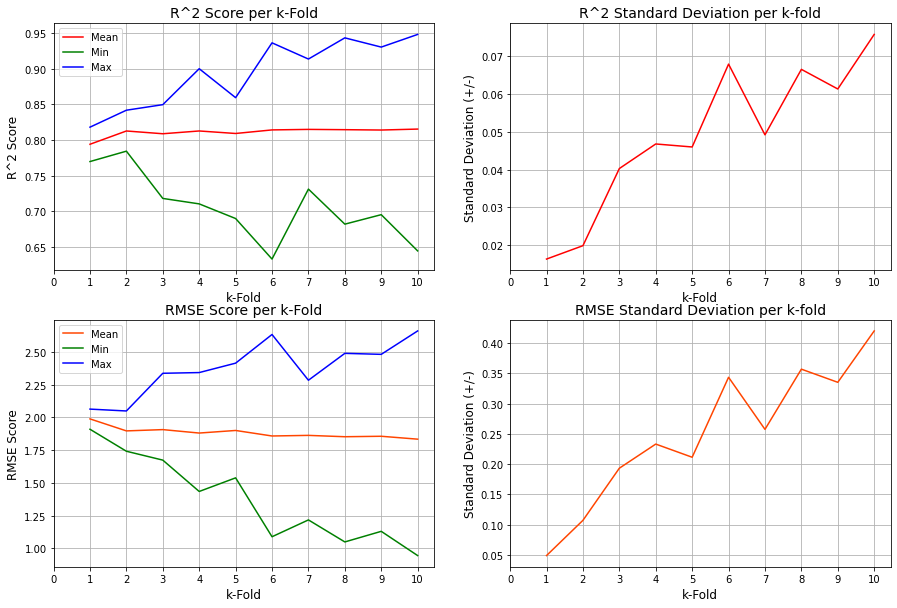

In [34]:
# Linear Regression - k-Fold Cross Validation
lr_cv = k_fold(lr_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.815</td>
      <td>1.833</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.076</td>
      <td>0.420</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.644</td>
      <td>0.946</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.949</td>
      <td>2.658</td>
    </tr>
  </tbody>
</table>

### Linear Support Vector Regression (Linear SVR)

In [35]:
# Define Linear SVR model
linear_svr = SVR(kernel='linear', C=0.3)

# Train Linear SVR model
linear_svr.fit(X_train, y_train)

SVR(C=0.3, kernel='linear')

In [36]:
# Predict test set results
linear_svr_pred = linear_svr.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((linear_svr_pred.reshape(len(linear_svr_pred), 1), 
#                       y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(linear_svr_pred)

MAE: 1.462
MSE: 6.477
RMSE: 2.545
R^2 Score: 0.765


<table border = "1">
  <thead>
    <th colspan = "5">Linear SVR Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>1.462</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>6.477</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>2.545</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.765</td>
    </tr>
  </tbody>
</table>

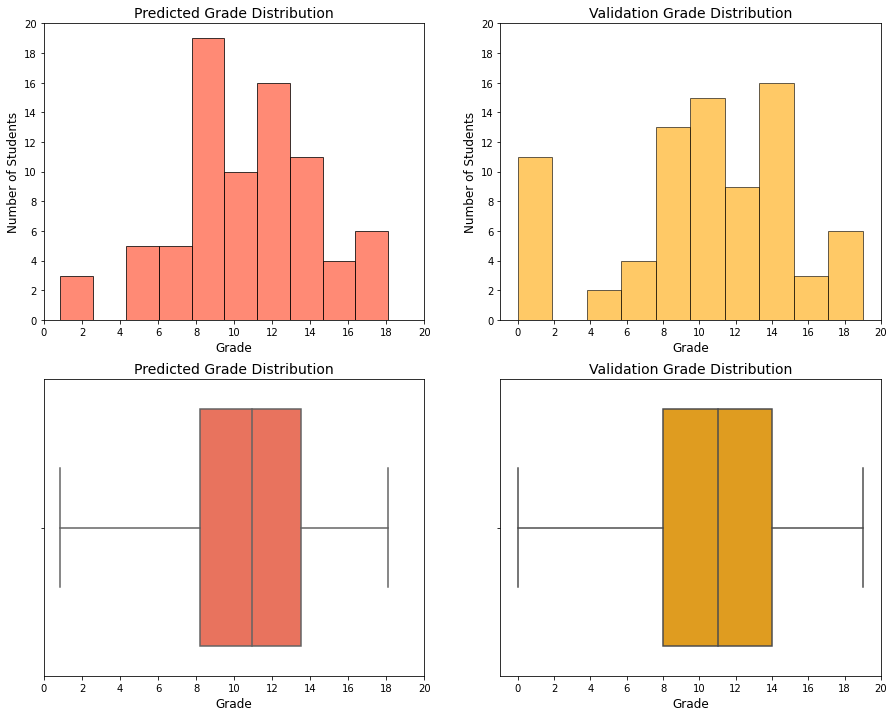

In [37]:
# Display Linear SVR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lsvr_dist = plot_dist(linear_svr_pred, 'tomato', 0.75, np.arange(0, 22, 2), 
                    np.arange(0, 22, 2))

# Show subplot
plt.show()

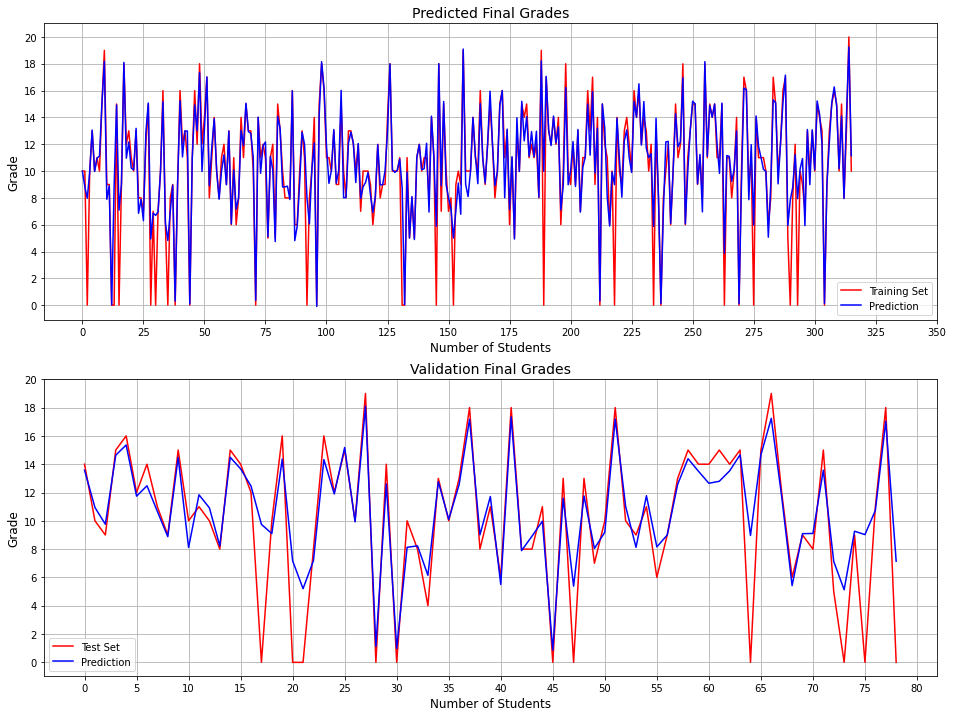

In [38]:
# Display Linear SVR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lsvr_results = pred_results(linear_svr, linear_svr_pred, np.arange(0, 22, 2), 
                            50, 5, "lower right", "lower left")

# Show subplot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.807846
Std: +/- 0.029523
Min: 0.761467
Max: 0.848107

RMSE Scoring:
Mean: 1.915263
Std: +/- 0.123384
Min: 1.744416
Max: 2.099403



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(



-- Fold: 2 --

R^2 Scoring:
Mean: 0.818309
Std: +/- 0.029527
Min: 0.777275
Max: 0.872925

RMSE Scoring:
Mean: 1.864283
Std: +/- 0.159251
Min: 1.558883
Max: 2.066998



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 3 --

R^2 Scoring:
Mean: 0.818434
Std: +/- 0.056418
Min: 0.692835
Max: 0.900179

RMSE Scoring:
Mean: 1.846468
Std: +/- 0.289575
Min: 1.354136
Max: 2.437341



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



-- Fold: 4 --

R^2 Scoring:
Mean: 0.817303
Std: +/- 0.062155
Min: 0.676554
Max: 0.929547

RMSE Scoring:
Mean: 1.842902
Std: +/- 0.315316
Min: 1.205730
Max: 2.473562



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 5 --

R^2 Scoring:
Mean: 0.817462
Std: +/- 0.072454
Min: 0.632594
Max: 0.941801

RMSE Scoring:
Mean: 1.834720
Std: +/- 0.366077
Min: 0.990386
Max: 2.625394



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.818014
Std: +/- 0.074363
Min: 0.641948
Max: 0.946165

RMSE Scoring:
Mean: 1.830285
Std: +/- 0.391038
Min: 1.004234
Max: 2.598029



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 7 --

R^2 Scoring:
Mean: 0.817639
Std: +/- 0.065662
Min: 0.697639
Max: 0.939332

RMSE Scoring:
Mean: 1.833146
Std: +/- 0.362263
Min: 1.021994
Max: 2.435598



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.817575
Std: +/- 0.082298
Min: 0.681803
Max: 0.980529

RMSE Scoring:
Mean: 1.805883
Std: +/- 0.485095
Min: 0.617125
Max: 2.488315



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear


-- Fold: 9 --

R^2 Scoring:
Mean: 0.818687
Std: +/- 0.082954
Min: 0.672889
Max: 0.975698

RMSE Scoring:
Mean: 1.800834
Std: +/- 0.494511
Min: 0.669368
Max: 2.568742



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(



-- Fold: 10 --

R^2 Scoring:
Mean: 0.819094
Std: +/- 0.091874
Min: 0.635915
Max: 0.979457

RMSE Scoring:
Mean: 1.784805
Std: +/- 0.538557
Min: 0.670048
Max: 2.704389



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(


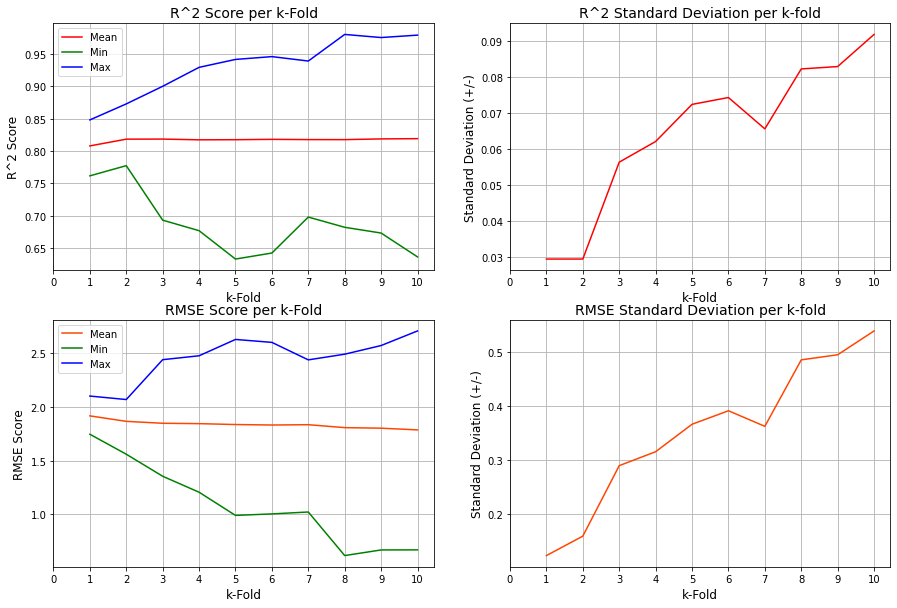

In [39]:
# Linear SVR - k-Fold Cross Validation
lsvr_cv = k_fold(linear_svr, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear SVR Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.819</td>
      <td>1.785</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.092</td>
      <td>0.539</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.636</td>
      <td>0.670</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.980</td>
      <td>2.704</td>
    </tr>
  </tbody>
</table>

In [40]:
# Apply Grid Search for parameter tuning

# linear_svr_params = {'C': [0.25, 0.275, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1], 
#                      'kernel': ['linear'],
#                      'epsilon': [0.025, 0.05, 0.075, 0.1]}

linear_svr_params = {'C': [0.3],
                     'kernel': ['linear']}

# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_mean_absolute_error', cv=lsvr_cv, n_jobs=-1)
# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_mean_squared_error', cv=lsvr_cv, n_jobs=-1)
# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_root_mean_squared_error', cv=lsvr_cv, n_jobs=-1)
linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='r2', cv=lsvr_cv, n_jobs=-1)
results = linear_svr_grid.fit(X_train, y_train)

# Summarize results
best_score = linear_svr_grid.best_score_
best_parameters = linear_svr_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R2
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(


Best Score: 81.909%
Best Parameters:  {'C': 0.3, 'kernel': 'linear'}


<table border = "1">
  <thead>
    <th colspan = "2">Linear SVR Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>81.909%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>0.3</td>
    </tr>
    <tr>
      <td><b>kernel</b></td>
      <td>'linear'</td>
    </tr>
  </tbody>
</table>

### Decision Tree (DT)

In [41]:
# Define DT model
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=4, random_state=0)

# Train DT model
dt_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=4, random_state=0)

In [42]:
# Predict test set results
dt_pred = dt_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((dt_pred.reshape(len(dt_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(dt_pred)

MAE: 1.679
MSE: 8.285
RMSE: 2.878
R^2 Score: 0.700


<table border = "1">
  <thead>
    <th colspan = "5">Decision Tree Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>1.679</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>8.285</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>2.878</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.700</td>
    </tr>
  </tbody>
</table>

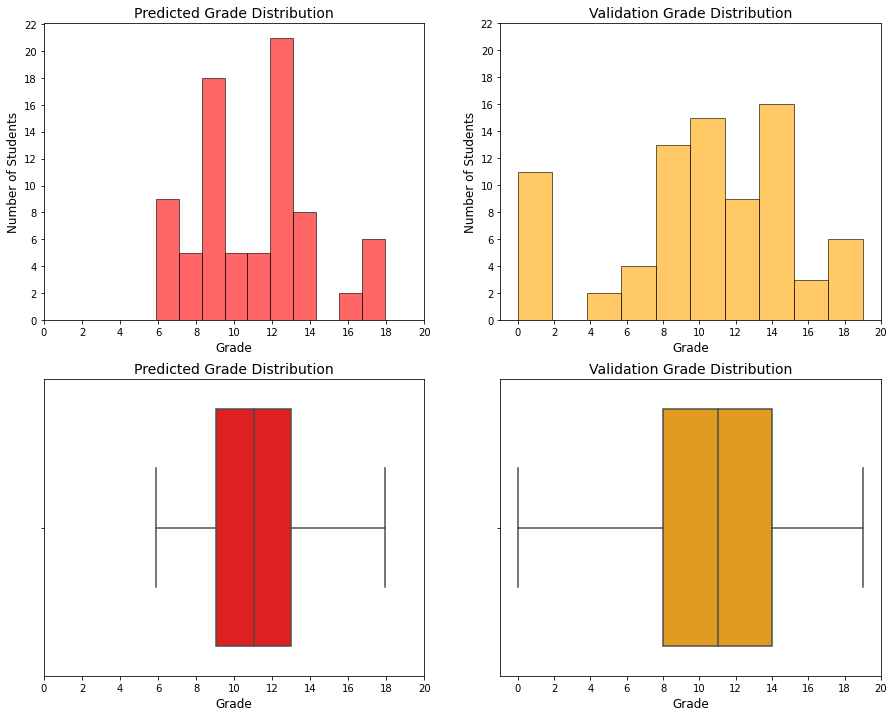

In [43]:
# Display DT prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
dt_dist = plot_dist(dt_pred, 'red', 0.6, np.arange(0, 22, 2), np.arange(0, 24, 2))

# Show subplot
plt.show()

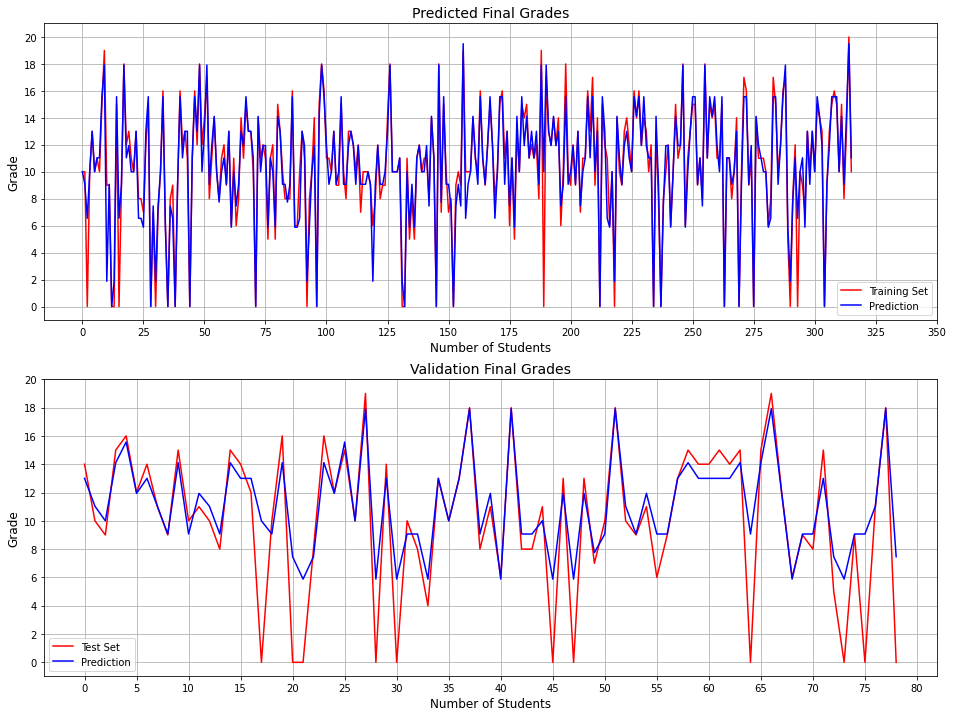

In [44]:
# Display DT training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
dt_results = pred_results(dt_reg, dt_pred, np.arange(0, 22, 2), 50, 5, 
                          "lower right", "lower left")

# Show subplot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.778606
Std: +/- 0.060326
Min: 0.658924
Max: 0.839448

RMSE Scoring:
Mean: 2.044486
Std: +/- 0.249744
Min: 1.793450
Max: 2.510423


-- Fold: 2 --

R^2 Scoring:
Mean: 0.805583
Std: +/- 0.069541
Min: 0.664846
Max: 0.896242

RMSE Scoring:
Mean: 1.905687
Std: +/- 0.329466
Min: 1.408618
Max: 2.535581


-- Fold: 3 --

R^2 Scoring:
Mean: 0.786584
Std: +/- 0.071398
Min: 0.671846
Max: 0.895992

RMSE Scoring:
Mean: 1.993857
Std: +/- 0.332698
Min: 1.382250
Max: 2.519235



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.820548
Std: +/- 0.063742
Min: 0.681958
Max: 0.908406

RMSE Scoring:
Mean: 1.828223
Std: +/- 0.334021
Min: 1.265350
Max: 2.510698


-- Fold: 5 --

R^2 Scoring:
Mean: 0.825587
Std: +/- 0.077304
Min: 0.634164
Max: 0.940608

RMSE Scoring:
Mean: 1.777580
Std: +/- 0.394168
Min: 1.086273
Max: 2.644516



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.790970
Std: +/- 0.114639
Min: 0.453976
Max: 0.935298

RMSE Scoring:
Mean: 1.935261
Std: +/- 0.524882
Min: 1.104406
Max: 3.208316


-- Fold: 7 --

R^2 Scoring:
Mean: 0.808537
Std: +/- 0.101384
Min: 0.542798
Max: 0.935164

RMSE Scoring:
Mean: 1.842667
Std: +/- 0.482525
Min: 1.164482
Max: 2.995379



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.837599
Std: +/- 0.083068
Min: 0.673536
Max: 0.975505

RMSE Scoring:
Mean: 1.703097
Std: +/- 0.462715
Min: 0.690154
Max: 2.519534


-- Fold: 9 --

R^2 Scoring:
Mean: 0.839237
Std: +/- 0.086772
Min: 0.670836
Max: 0.963675

RMSE Scoring:
Mean: 1.690268
Std: +/- 0.492974
Min: 0.818364
Max: 2.525950



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear


-- Fold: 10 --

R^2 Scoring:
Mean: 0.828261
Std: +/- 0.125079
Min: 0.549185
Max: 0.976665

RMSE Scoring:
Mean: 1.686925
Std: +/- 0.687160
Min: 0.714135
Max: 2.992343



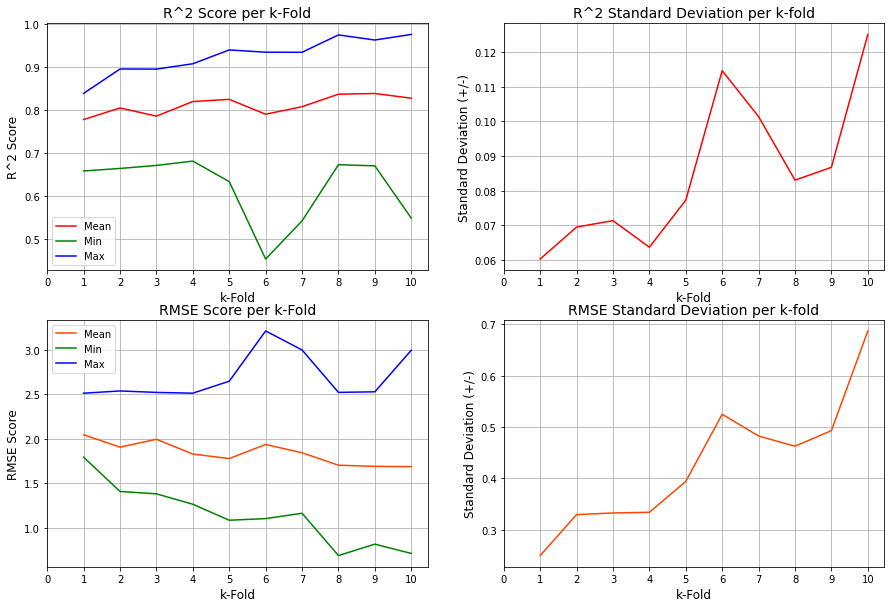

In [45]:
# Decision Tree - k-Fold Cross Validation
dt_cv = k_fold(dt_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.828</td>
      <td>1.687</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.125</td>
      <td>0.687</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.549</td>
      <td>0.714</td>
    <tr>
      <td><b>Max</b></td>
      <td>0.977</td>
      <td>2.992</td>
    </tr>
  </tbody>
</table>

In [46]:
# Apply Grid Search for parameter tuning

# dt_params = {'criterion': ['mse', 'mae'],
#              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#              'min_samples_leaf': [2, 5, 10],
#              'min_samples_split': [2, 5, 10],
#              'max_features': [2, 5, 10, 15, 20, 25],
#              'random_state': [0, 1, 2]}

dt_params = {'criterion': ['mse'],
             'max_depth': [4],
             'random_state': [0]}

# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_absolute_error', cv=dt_cv, n_jobs=-1)
# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_squared_error', cv=dt_cv, n_jobs=-1)
# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_root_mean_squared_error', cv=dt_cv, n_jobs=-1)
dt_grid = GridSearchCV(dt_reg, dt_params, scoring='r2', cv=dt_cv, n_jobs=-1)
results = dt_grid.fit(X_train, y_train)

# Summarize results
best_score = dt_grid.best_score_
best_parameters = dt_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

Best Score: 82.826%
Best Parameters:  {'criterion': 'mse', 'max_depth': 4, 'random_state': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>82.826%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Random Forest (RF)

In [47]:
# Define RF model
rf_reg = RandomForestRegressor(criterion='mse', max_depth=9, n_estimators=48, 
                               min_samples_split=2, max_samples=0.6,
                               random_state=0)

# Train RF model
rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=9, max_samples=0.6,
                      n_estimators=48, random_state=0)

In [48]:
# Predict test set results
rf_pred = rf_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((rf_pred.reshape(len(rf_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(rf_pred)

MAE: 1.616
MSE: 6.733
RMSE: 2.595
R^2 Score: 0.756


<table border = "1">
  <thead>
    <th colspan = "5">Random Forest Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>1.616</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>6.733</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>2.595</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.756</td>
    </tr>
  </tbody>
</table>

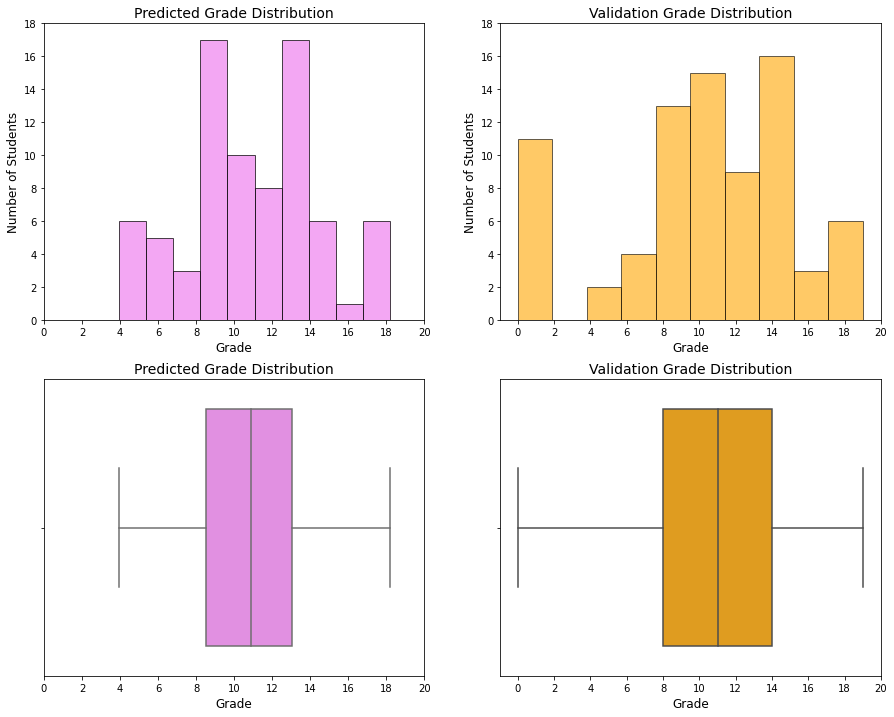

In [49]:
# Display RF prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
rf_dist = plot_dist(rf_pred, 'violet', 0.7, np.arange(0, 22, 2), np.arange(0, 20, 2))

# Show subplot
plt.show()

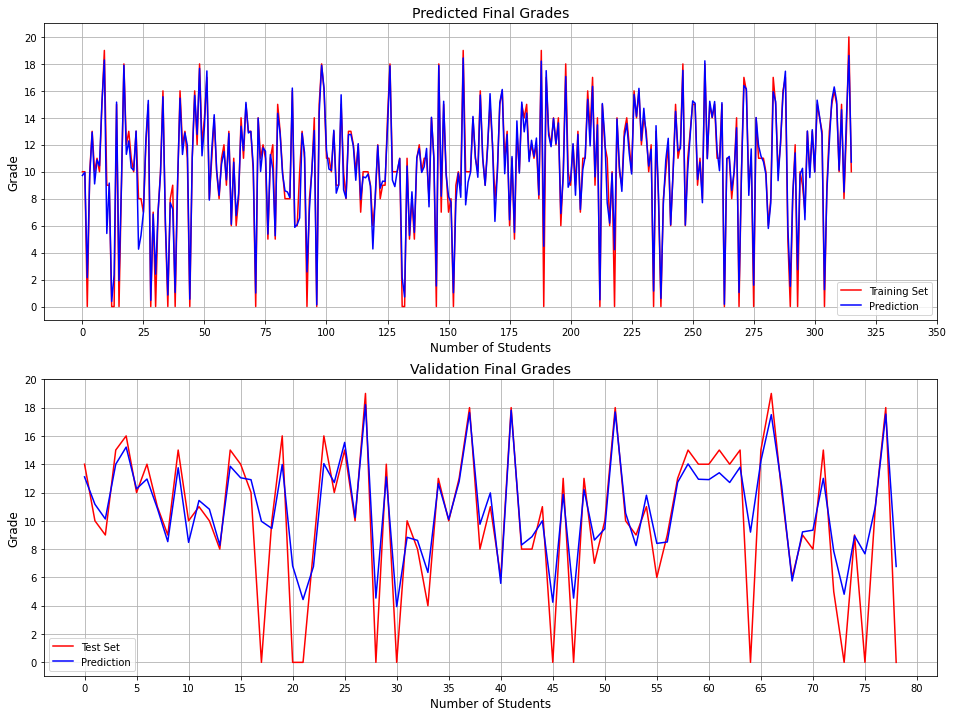

In [50]:
# Display RF training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
rf_results = pred_results(rf_reg, rf_pred, np.arange(0, 22, 2), 50, 5, 
                          "lower right", "lower left")

# Show subplot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.854171
Std: +/- 0.037363
Min: 0.781729
Max: 0.888749

RMSE Scoring:
Mean: 1.659209
Std: +/- 0.177202
Min: 1.492909
Max: 2.008256



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 2 --

R^2 Scoring:
Mean: 0.867734
Std: +/- 0.019531
Min: 0.828955
Max: 0.892254

RMSE Scoring:
Mean: 1.591994
Std: +/- 0.121444
Min: 1.435436
Max: 1.824312



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 3 --

R^2 Scoring:
Mean: 0.862262
Std: +/- 0.047684
Min: 0.772988
Max: 0.915580

RMSE Scoring:
Mean: 1.601851
Std: +/- 0.264978
Min: 1.295329
Max: 2.095342



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.861489
Std: +/- 0.045204
Min: 0.747773
Max: 0.915466

RMSE Scoring:
Mean: 1.610790
Std: +/- 0.246660
Min: 1.294397
Max: 2.184324



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 5 --

R^2 Scoring:
Mean: 0.864792
Std: +/- 0.051394
Min: 0.723905
Max: 0.918908

RMSE Scoring:
Mean: 1.581718
Std: +/- 0.257843
Min: 1.266835
Max: 2.275885



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.861737
Std: +/- 0.073954
Min: 0.601418
Max: 0.931486

RMSE Scoring:
Mean: 1.582439
Std: +/- 0.375083
Min: 1.094776
Max: 2.741132



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 7 --

R^2 Scoring:
Mean: 0.865685
Std: +/- 0.050105
Min: 0.750161
Max: 0.943004

RMSE Scoring:
Mean: 1.572128
Std: +/- 0.285137
Min: 0.990586
Max: 2.117541



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.868678
Std: +/- 0.060388
Min: 0.690010
Max: 0.931803

RMSE Scoring:
Mean: 1.552488
Std: +/- 0.327755
Min: 1.151559
Max: 2.396730



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear


-- Fold: 9 --

R^2 Scoring:
Mean: 0.866026
Std: +/- 0.058402
Min: 0.705624
Max: 0.930894

RMSE Scoring:
Mean: 1.567190
Std: +/- 0.340930
Min: 1.079361
Max: 2.382362



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear


-- Fold: 10 --

R^2 Scoring:
Mean: 0.871988
Std: +/- 0.072227
Min: 0.695155
Max: 0.971475

RMSE Scoring:
Mean: 1.498829
Std: +/- 0.463423
Min: 0.769258
Max: 2.460663



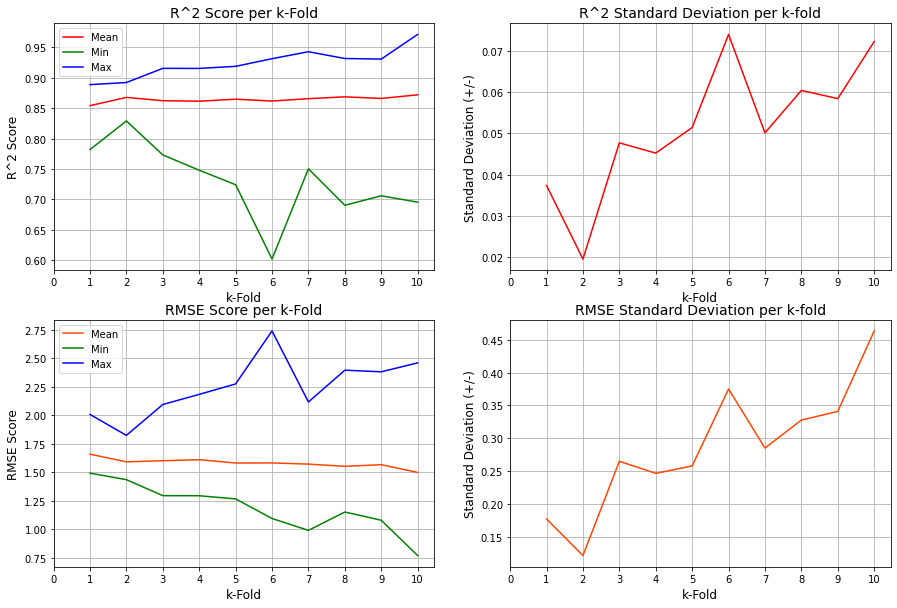

In [51]:
# Random Forest - k-Fold Cross Validation
rf_cv = k_fold(rf_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Random Forest Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.871</td>
      <td>1.499</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.072</td>
      <td>0.463</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.695</td>
      <td>0.769</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.972</td>
      <td>2.461</td>
    </tr>
  </tbody>
</table>

In [52]:
# Apply Grid Search for parameter tuning

# rf_params = {'n_estimators': [50, 100, 150, 200, 250],
#              'criterion': ['mse', 'mae'],
#              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#              'min_samples_leaf': [2, 5, 8, 10],
#              'min_samples_split': [2, 5, 8, 10],
#              'max_samples': [0.2, 0.4, 0.6, 0.8, 1],
#              'random_state': [0, 1, 2]}

rf_params = {'criterion': ['mse'],
             'max_depth': [9],
             'n_estimators': [48],
             'min_samples_split': [2],
             'max_samples': [0.6],
             'random_state': [0]}

# rf_grid = GridSearchCV(rf_reg, rf_params, scoring='neg_mean_absolute_error', cv=rf_cv, n_jobs=-1)
# rf_grid = GridSearchCV(rf_reg, rf_params, scoring='neg_mean_squared_error', cv=rf_cv, n_jobs=-1)
# rf_grid = GridSearchCV(rf_reg, rf_params, scoring='neg_root_mean_squared_error', cv=rf_cv, n_jobs=-1)
rf_grid = GridSearchCV(rf_reg, rf_params, scoring='r2', cv=rf_cv, n_jobs=-1)
results = rf_grid.fit(X_train, y_train)

# Summarize results
best_score = rf_grid.best_score_
best_parameters = rf_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(


Best Score: 87.199%
Best Parameters:  {'criterion': 'mse', 'max_depth': 9, 'max_samples': 0.6, 'min_samples_split': 2, 'n_estimators': 48, 'random_state': 0}


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


<table border = "1">
  <thead>
    <th colspan = "2">Random Forest Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>87.199%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>9</td>
    </tr>
    <tr>
      <td><b>max_samples</b></td>
      <td>0.6</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>48</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### XGBoost (XGB)

In [53]:
# Define XGB model
xgb_reg = XGBRegressor(max_depth=6, n_estimators=50, colsample_bytree=0.9, 
                       random_state=0)

# Train XGB model
xgb_reg.fit(X_train, y_train)

[19:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.9, max_depth=6, n_estimators=50)

In [54]:
# Predict test set results
xgb_pred = xgb_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((xgb_pred.reshape(len(xgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(xgb_pred)

MAE: 1.599
MSE: 6.426
RMSE: 2.535
R^2 Score: 0.767


<table border = "1">
  <thead>
    <th colspan = "5">XGBoost Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>1.599</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>6.426</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>2.535</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.767</td>
    </tr>
  </tbody>
</table>

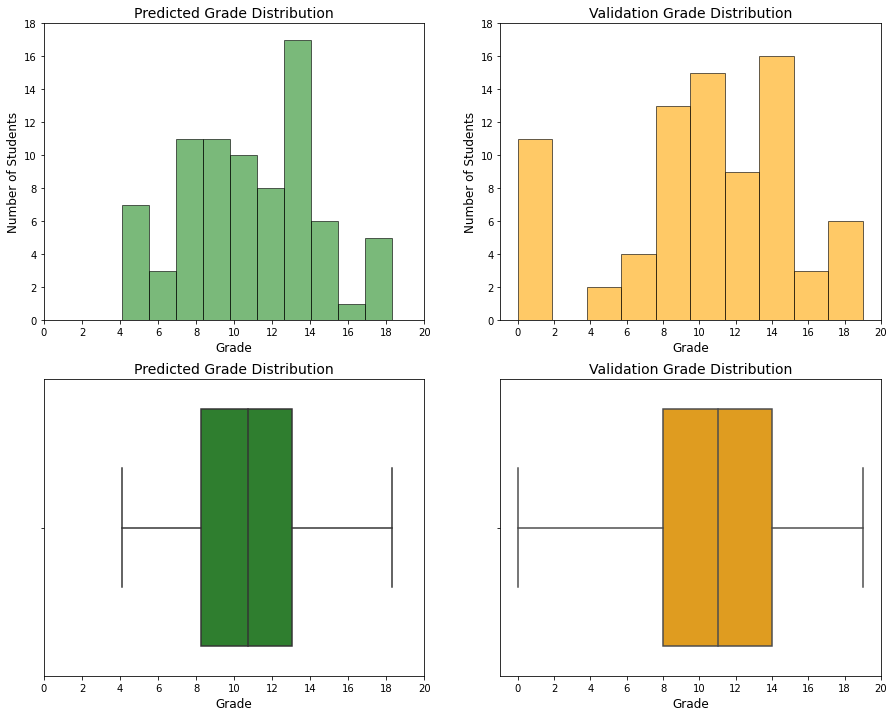

In [55]:
# Display XGB prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
xgb_dist = plot_dist(xgb_pred, 'forestgreen', 0.6, np.arange(0, 22, 2), 
                     np.arange(0, 20, 2))

# Show subplot
plt.show()

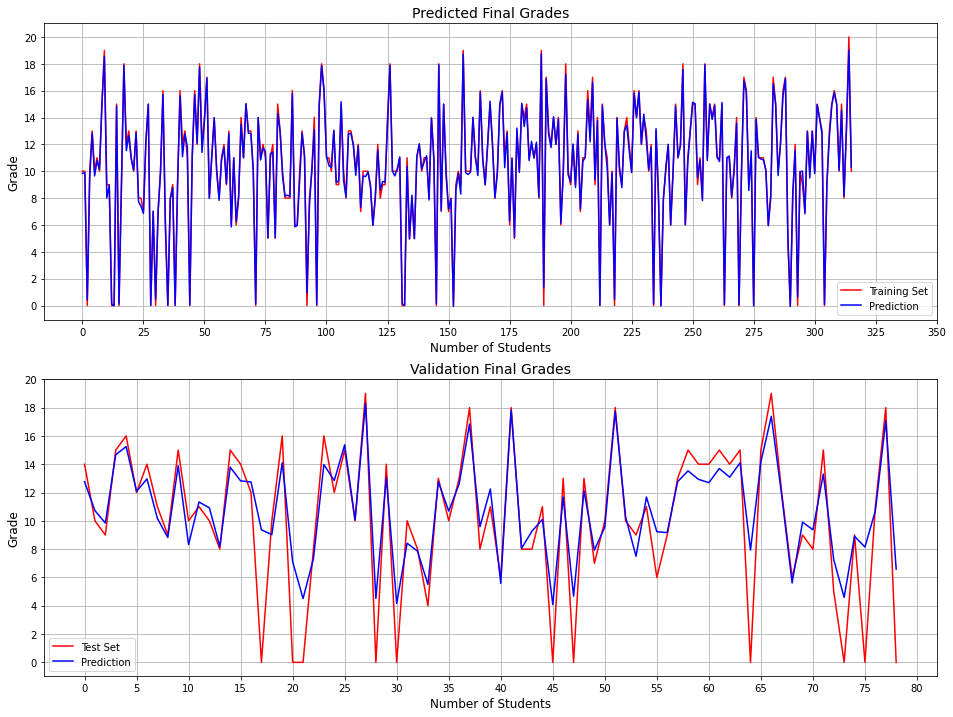

In [56]:
# Display XGB training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
xgb_results = pred_results(xgb_reg, xgb_pred, np.arange(0, 22, 2), 50, 5, 
                          "lower right", "lower left")

# Show subplot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.851660
Std: +/- 0.035864
Min: 0.798295
Max: 0.885373

RMSE Scoring:
Mean: 1.673877
Std: +/- 0.169798
Min: 1.515393
Max: 1.930546



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 2 --

R^2 Scoring:
Mean: 0.877252
Std: +/- 0.020845
Min: 0.836329
Max: 0.905010

RMSE Scoring:
Mean: 1.532209
Std: +/- 0.132910
Min: 1.349878
Max: 1.784554



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 3 --

R^2 Scoring:
Mean: 0.872029
Std: +/- 0.040975
Min: 0.794302
Max: 0.920474

RMSE Scoring:
Mean: 1.547164
Std: +/- 0.239843
Min: 1.208668
Max: 1.994550



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.869816
Std: +/- 0.054035
Min: 0.742384
Max: 0.941986

RMSE Scoring:
Mean: 1.548298
Std: +/- 0.321882
Min: 1.072306
Max: 2.207536



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 5 --

R^2 Scoring:
Mean: 0.876718
Std: +/- 0.046635
Min: 0.766396
Max: 0.941110

RMSE Scoring:
Mean: 1.507028
Std: +/- 0.253161
Min: 1.061024
Max: 2.093446



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.880043
Std: +/- 0.062003
Min: 0.682019
Max: 0.966394

RMSE Scoring:
Mean: 1.471564
Std: +/- 0.357701
Min: 0.793428
Max: 2.448340



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 7 --

R^2 Scoring:
Mean: 0.884606
Std: +/- 0.042961
Min: 0.793345
Max: 0.973317

RMSE Scoring:
Mean: 1.454527
Std: +/- 0.288237
Min: 0.677778
Max: 2.013565



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.887105
Std: +/- 0.049551
Min: 0.770680
Max: 0.963537

RMSE Scoring:
Mean: 1.437017
Std: +/- 0.317828
Min: 0.842032
Max: 2.068134



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear


-- Fold: 9 --

R^2 Scoring:
Mean: 0.884339
Std: +/- 0.052989
Min: 0.771320
Max: 0.966109

RMSE Scoring:
Mean: 1.446616
Std: +/- 0.353063
Min: 0.790475
Max: 2.129773



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear


-- Fold: 10 --

R^2 Scoring:
Mean: 0.891574
Std: +/- 0.056179
Min: 0.772831
Max: 0.979796

RMSE Scoring:
Mean: 1.388074
Std: +/- 0.413471
Min: 0.647686
Max: 2.124159



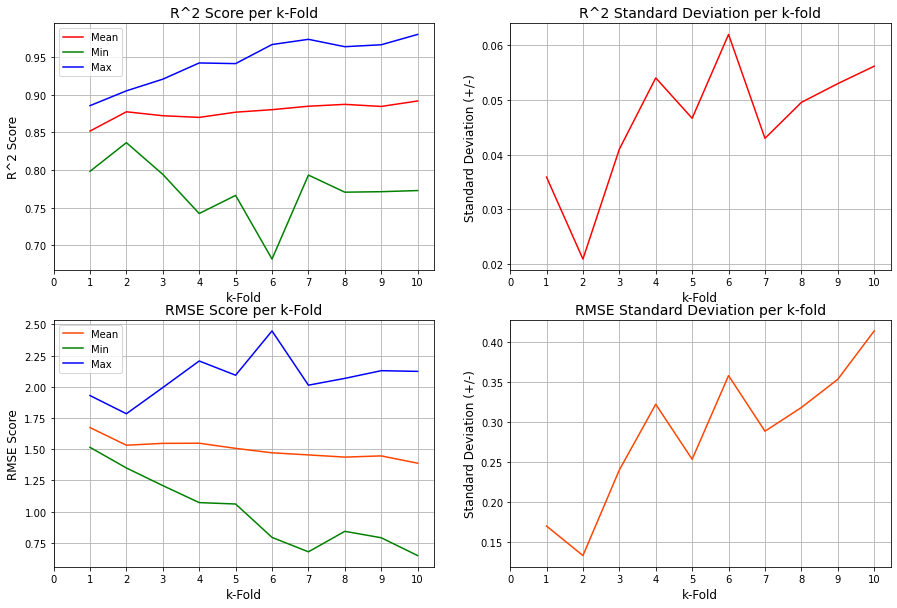

In [57]:
# XGBoost - k-Fold Cross Validation
xgb_cv = k_fold(xgb_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">XGBoost Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.892</td>
      <td>1.388</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.056</td>
      <td>0.414</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.773</td>
      <td>0.648</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.980</td>
      <td>2.124</td>
    </tr>
  </tbody>
</table>

In [58]:
# Apply Grid Search for parameter tuning

# xgb_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
#               'learning_rate': [0.05, 0.1, 0.15],
#               'reg_alpha':[0.001, 0.01, 0.1, 1],
#               'colsample_bytree': [0.3, 0.5, 0.7],
#               'n_estimators': [50, 100, 150, 200],
#               'min_child_weight': [2, 5, 8, 10],
#               'gamma': [0, 0.05, 0.1],
#               'subsample': [0.6, 0.8, 1.0],
#               'random_state': [0, 1, 5, 10, 20, 42]}

xgb_params = {'max_depth': [6],
              'n_estimators': [50],
              'colsample_bytree': [0.9],
              'random_state': [0]}

# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_absolute_error', cv=xgb_cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_squared_error', cv=xgb_cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_root_mean_squared_error', cv=xgb_cv, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='r2', cv=xgb_cv, n_jobs=-1)
results = xgb_grid.fit(X_train, y_train)

# Summarize results
best_score = xgb_grid.best_score_
best_parameters = xgb_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(


[19:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: 89.157%
Best Parameters:  {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 50, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>89.157%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>0.9</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>6</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>50</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

## 4. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores - Math</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan='2'><b>R^2</b></td>
      <td colspan='2'><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
    </tr>
    <tr>
      <td><b>Linear Regression (LR)</b></td>
      <td>0.815</td>
      <td>0.792</td>
      <td>1.833</td>
      <td>2.398</td>
    </tr>
    <tr>
      <td><b>Linear SVR</b></td>
      <td>0.819</td>
      <td>0.765</td>
      <td>1.785</td>
      <td>2.545</td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>0.828</td>
      <td>0.700</td>
      <td>1.687</td>
      <td>2.878</td>
    </tr>
    <tr>
      <td><b>Random Forest (RF)</b></td>
      <td>0.871</td>
      <td>0.756</td>
      <td>1.499</td>
      <td>2.595</td>
    </tr>
    <tr>
      <td><b>XGBoost (XGB)</b></td>
      <td>0.892</td>
      <td>0.767</td>
      <td>1.388</td>
      <td>2.535</td>
    </tr>
  </tbody>
</table>

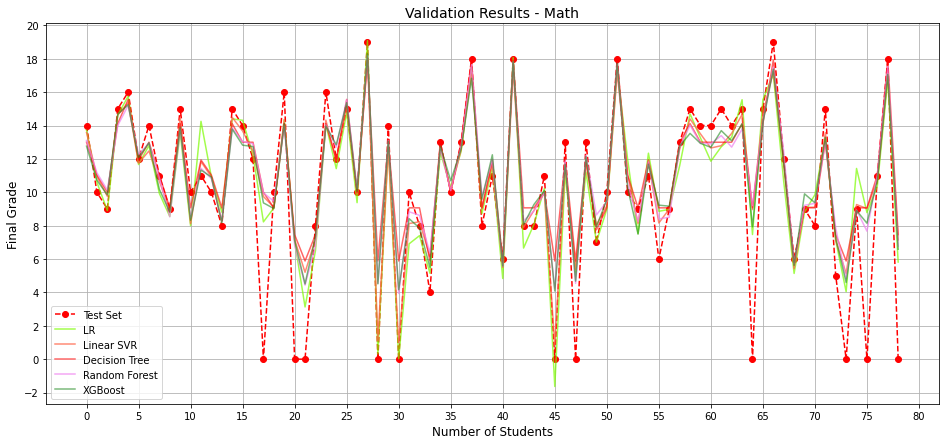

In [59]:
# Predicted vs Validation Results - Combined Distribution
overall_results = plt.figure(figsize=(16, 7))
# Labels for legend
model_labels = ['Test Set', 'LR', 'Linear SVR', 'Decision Tree', 'Random Forest', 
                'XGBoost']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# LR
overall_results = plt.plot(lr_pred, color='lawngreen', alpha=0.7)
# Linear SVR
overall_results = plt.plot(linear_svr_pred, color='tomato', alpha=0.75)
# Decision Tree
overall_results = plt.plot(dt_pred, color='red', alpha=0.6)
# Random Forest
overall_results = plt.plot(rf_pred, color='violet', alpha=0.7)
# XGBoost
overall_results = plt.plot(xgb_pred, color='forestgreen', alpha=0.6)

# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, len(y_test)+5, 5))
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Validation Results - Math', fontsize=14)
# Plot legend and grid
plt.legend(labels=model_labels, loc='lower left')
plt.grid()

# Show subplot
plt.show()

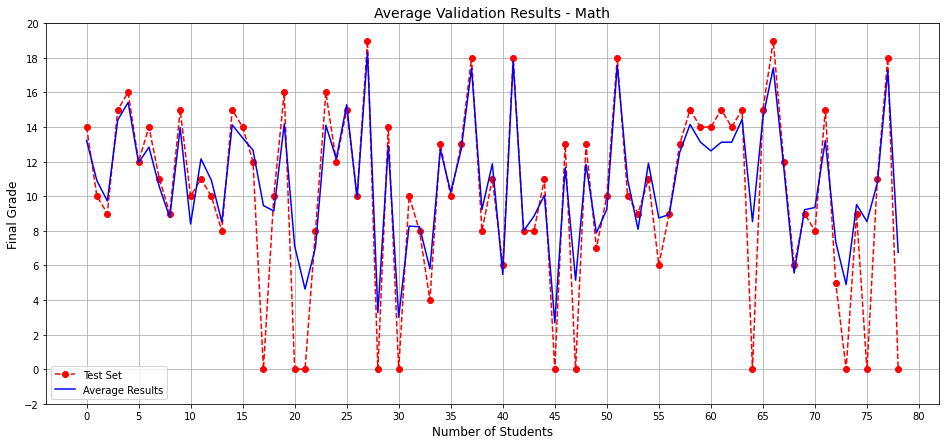

In [60]:
# Average Validation Results
average_results = plt.figure(figsize=(16, 7))
# Labels for legend
results_labels = ['Test Set', 'Average Results']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# Compute Average Results
running_avg = []
for i in range(0, len(y_test)):
  running_avg.append( (lr_pred[i] + linear_svr_pred[i] + dt_pred[i] + rf_pred[i] 
                       + xgb_pred[i])/5 )
# Plot Average Results
avg_results = plt.plot(running_avg[0:len(y_test)], color='blue')

# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, len(y_test)+5, 5))
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Average Validation Results - Math', fontsize=14)
# Plot legend and grid
plt.legend(labels=results_labels, loc='lower left')
plt.grid()

# Show subplot
plt.show()

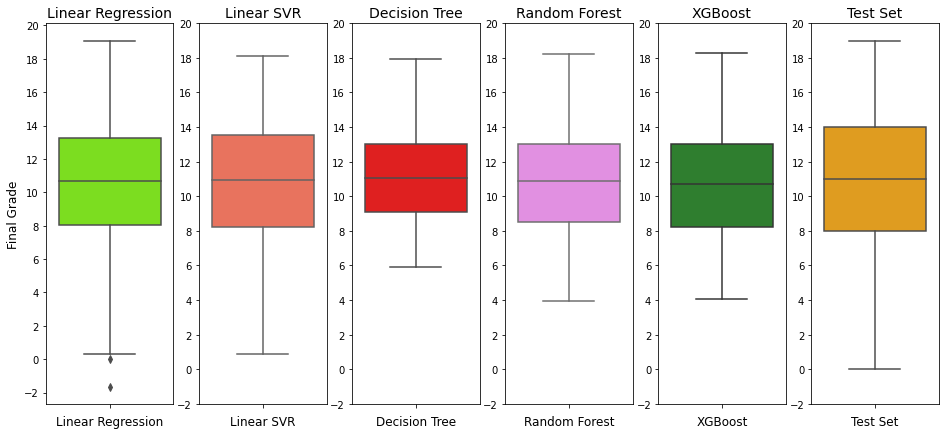

In [61]:
# Combines box plot distributions
box_plots_comb = plt.figure(figsize=(16, 7))

# Box plot for lr_pred
ax1 = box_plots_comb.add_subplot(1, 6, 1)
ax1 = sns.boxplot(y=lr_pred, color='lawngreen', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Linear Regression', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Linear Regression', fontsize=14)

# Box plot for linear_svr_pred
ax2 = box_plots_comb.add_subplot(1, 6, 2)
ax2 = sns.boxplot(y=linear_svr_pred, color='tomato', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Linear SVR', fontsize=12)
plt.title('Linear SVR', fontsize=14)

# Box plot for dt_pred
ax3 = box_plots_comb.add_subplot(1, 6, 3)
ax3 = sns.boxplot(y=dt_pred, color='red', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Decision Tree', fontsize=12)
plt.title('Decision Tree', fontsize=14)

# Box plot for rf_pred
ax4 = box_plots_comb.add_subplot(1, 6, 4)
ax4 = sns.boxplot(y=rf_pred, color='violet', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Random Forest', fontsize=12)
plt.title('Random Forest', fontsize=14)

# Box plot for xgb_pred
ax5 = box_plots_comb.add_subplot(1, 6, 5)
ax5 = sns.boxplot(y=xgb_pred, color='forestgreen', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('XGBoost', fontsize=12)
plt.title('XGBoost', fontsize=14)

# Box plot for y_test
ax6 = box_plots_comb.add_subplot(1, 6, 6)
ax6 = sns.boxplot(y=y_test, color='orange', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Test Set', fontsize=12)
plt.title('Test Set', fontsize=14)

# Show subplot
plt.show()